## Projet d'apprentissage supervisé

In [1]:
# Import des librairies nécessaires
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
%matplotlib inline

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '.log',
 '1_Preprocessing.ipynb',
 '2_EDA.ipynb',
 '3_Modelisation-Copy1.ipynb',
 '3_Modelisation.ipynb',
 'cleaned',
 'source']

In [3]:
path = 'source/'
filename = 'Dataset_projet_2.csv'

In [4]:
# Importer les données
data = pd.read_csv(path+filename)

### Affichage

In [5]:
# Observation du dataset
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
# Dimension du dataset
data.shape

(3376, 46)

3400 individus et 46 variables, cela me paraît raisonnable au niveau des individus mais avec beaucoup de variables, une réduction sera nécessaire. 

### Structure 

In [7]:
# Types de données disponibles dans le dataset
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

<AxesSubplot:ylabel='None'>

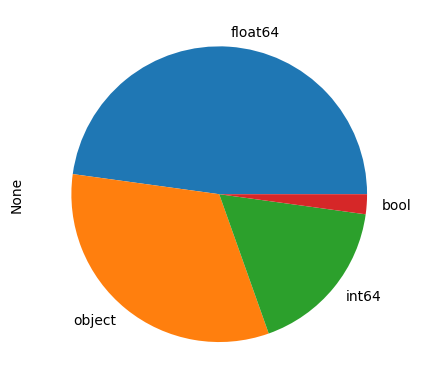

In [9]:
# Proportion des types de données
data.dtypes.value_counts().plot.pie()

In [10]:
# Observation des variables
data.columns 

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [11]:
# Informations sur le jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### NAN et dupliqué

In [96]:
# Observation des valeurs manquantes 
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [8]:
data.duplicated().sum() 
# 0 doublons parfait

0

### Inspection de la donnée

In [ ]:
# Description générale des variables quantitatives
data.describe()

### Nettoyage

In [9]:
# Supprimer les colonnes sans données et les lignes completement vides
data.dropna(axis = 1, how = 'all', inplace = True) # Les colonnes sans aucune données
data.dropna(axis = 0, how = 'all', inplace = True) # Les lignes sans données 

#### Suppression des colonnes qui ne possèdent qu'une information unique

In [10]:
tmp = data.nunique()
tmp

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [11]:
cols = tmp[tmp==1].index
cols

Index(['DataYear', 'City', 'State'], dtype='object')

In [12]:
data.drop(columns = cols, inplace = True)
data.nunique()

OSEBuildingID                      3376
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352
ThirdLargestPropertyUseType          44
ThirdLargestPropertyUseTypeGFA      501
YearsENERGYSTARCertified             65


#### Filtrage technique

In [13]:
# Suppression des outliers dans le dataset 
data = data[data["Outlier"].isna()]
data.shape

(3344, 42)

In [14]:
# On recupère les propriétés qui répondent aux exigences d'analyse et dont on est sûr qu'ils ne contiennent pas de données erronées
data = data[data["ComplianceStatus"]=="Compliant"]

In [15]:
# Fixation d'un seuil pour éliminer les variables qui contiennent trop de données manquantes
nb_na = data.isnull().sum()
seuil = 0.3*len(data) # Seuil d'acceptation à 30%, on accepte 30% de valeurs manquantes au maximum 
data.shape[1]-len(nb_na[nb_na>seuil]) # 36 colonnes ont moins de 30% de valeurs nulles

36

In [16]:
# On supprime les colonnes qui ne repondent pas à notre condition
to_drop = nb_na[nb_na>seuil].index
data.drop(to_drop, axis = 1, inplace = True)

In [17]:
data.shape

(3211, 36)

In [18]:
# On conserve les bâtiments qui ne sont pas destinés à l'habitation, car la demande du projet porte sur les bâtiments non destinés à l'habitation
data = data[(data["BuildingType"].str.find('NonResidential') != -1) | (data["BuildingType"].str.find('Nonresidential') != -1)]

In [19]:
data.shape

(1514, 36)

#### Filtrage metier 

Il ne faut pas prendre en compte toute les variables avec les kbtu, car cela permet d'expliquer la target à travers les autres variables.  
De plus, cela permet d'éviter le data leakage car ces données ne seront pas disponibles selon l'encadré donné dans le cadre de l'explication du projet.

In [23]:
# On sélectionne les variables à étudier dans un premier temps, on rajoutera d'autres variables dans un second temps
variables = ["YearBuilt", "NumberofBuildings", "NumberofFloors", "PropertyGFABuilding(s)", "PropertyGFATotal", "TotalGHGEmissions", "SiteEnergyUse(kBtu)", "ENERGYSTARScore" ]

In [24]:
# Creation de notre nouveau dataset
data1 = data[variables]

In [25]:
# Données manquantes
data1.isna().mean()

YearBuilt                 0.000000
NumberofBuildings         0.000000
NumberofFloors            0.000000
PropertyGFABuilding(s)    0.000000
PropertyGFATotal          0.000000
TotalGHGEmissions         0.000000
SiteEnergyUse(kBtu)       0.000000
ENERGYSTARScore           0.350066
dtype: float64

In [142]:
# On supprime les lignes qui ne possèdent pas de TotalGHGEmissions renseigné, car cela ne correspond que à 4 lignes et que c'est une de nos variables d'intérêt
# data1.dropna(subset = "TotalGHGEmissions", inplace = True)

2023-03-02 13:44:06,774 [5908] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\AppData\Local\Temp\ipykernel_5908\709352113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(subset = "TotalGHGEmissions", inplace = True)



In [26]:
# On supprime la variable energySTARScore de notre jeu de données 
Energy = data1['ENERGYSTARScore']
data1.drop('ENERGYSTARScore', axis = 1, inplace = True)

2023-03-15 12:07:18,638 [16636] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\AppData\Local\Temp\ipykernel_16636\1595310594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('ENERGYSTARScore', axis = 1, inplace = True)



In [27]:
# Matrice de corrélation pour voir les liaisons entre nos variables
data1.corr()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu)
YearBuilt,1.000000,0.041076,0.105018,0.182247,0.227418,0.077853,0.152553
NumberofBuildings,0.041076,1.000000,-0.008476,0.206213,0.173940,0.501924,0.414390
NumberofFloors,0.105018,-0.008476,1.000000,0.651805,0.685935,0.188095,0.389815
PropertyGFABuilding(s),0.182247,0.206213,0.651805,1.000000,0.978367,0.508408,0.675340
PropertyGFATotal,0.227418,0.173940,0.685935,0.978367,1.000000,0.465045,0.649579
TotalGHGEmissions,0.077853,0.501924,0.188095,0.508408,0.465045,1.000000,0.881831
SiteEnergyUse(kBtu),0.152553,0.414390,0.389815,0.675340,0.649579,0.881831,1.000000


On remarque des corrélations fortes entre certaines variables comme le nombre de batiments et le l'electricité ou la surface et l'electricité.

#### Valeurs aberrantes

In [28]:
data1.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1514.000000,1514.000000,1514.000000,1.514000e+03,1.514000e+03,1514.000000,1.514000e+03
mean,1961.542272,1.034346,4.320343,9.817993e+04,1.122383e+05,167.408151,7.726794e+06
std,32.817364,0.565717,6.845072,1.664155e+05,1.903593e+05,575.982871,1.879214e+07
min,1900.000000,0.000000,0.000000,3.636000e+03,1.128500e+04,-0.800000,5.713320e+04
25%,1930.000000,1.000000,1.000000,2.780000e+04,2.880000e+04,20.092500,1.233141e+06
50%,1965.000000,1.000000,2.000000,4.563700e+04,4.769250e+04,49.215000,2.665809e+06
75%,1988.000000,1.000000,4.000000,9.359625e+04,1.034245e+05,140.830000,7.064835e+06
max,2015.000000,9.000000,99.000000,1.765970e+06,1.952220e+06,12307.160000,2.930908e+08


In [29]:
data1[data1.NumberofFloors >50]
# En observant le jeu de données, on voit bien que la propriété avec 99 etages n'est pas bien renseignée
# En effet, on remarque que malgré le nombre d'étage, la surface et les consommations ne correspondent pas
# On supprime donc cette ligne
data1 = data1[data1.NumberofFloors <90]

In [30]:
# Creation de notre dataset
df = data1.copy()

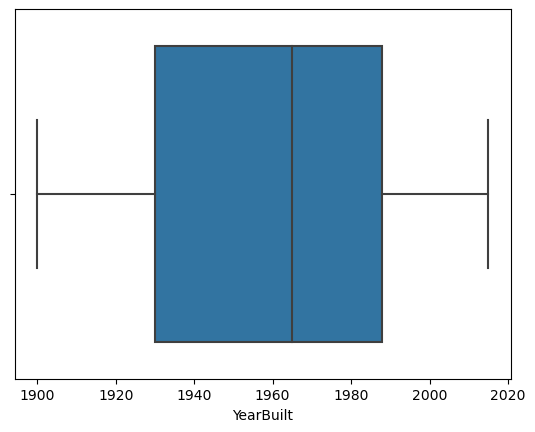

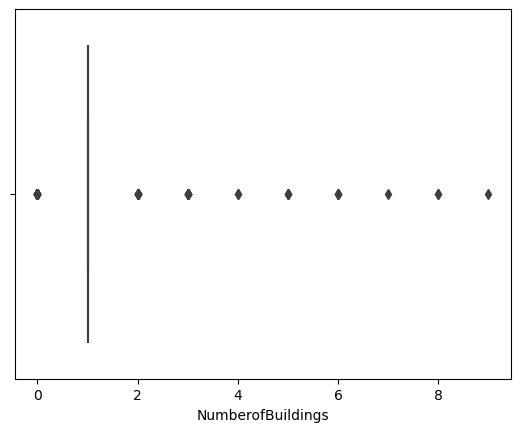

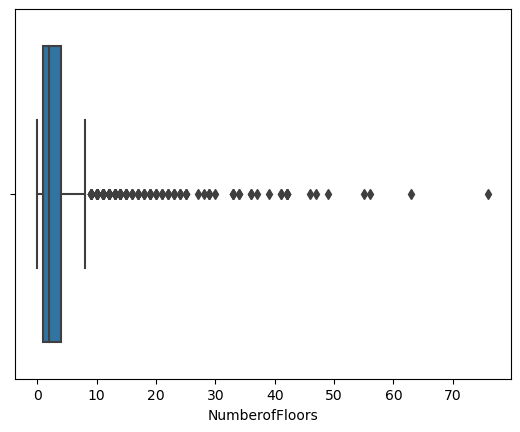

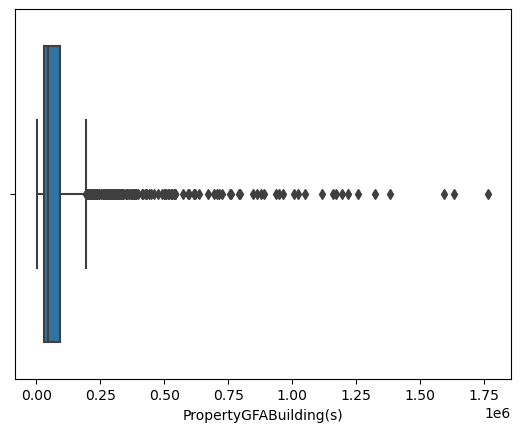

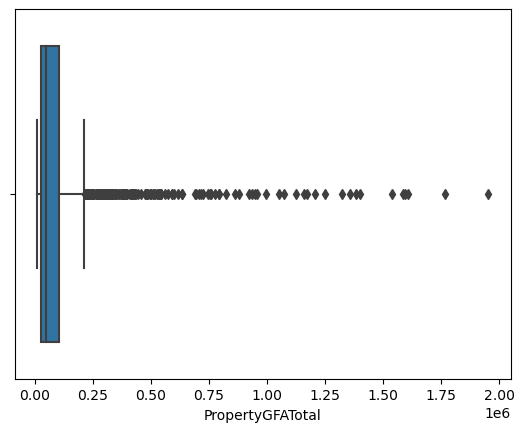

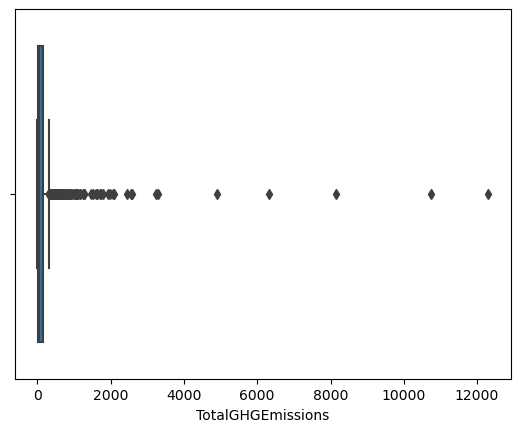

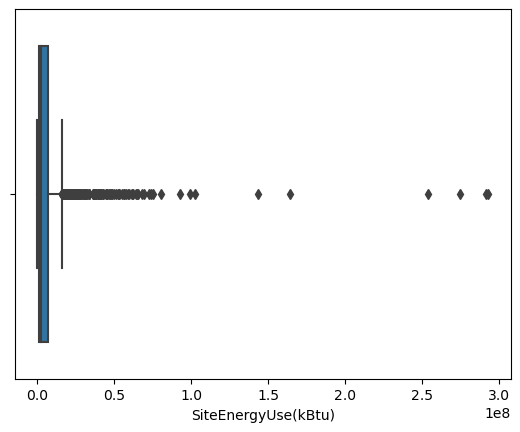

In [31]:
# Boxplot pour observer la distribution de nos variables
# On garde data1 pour pouvoir y ajouter après notre variable du score
for elem in df.columns :
    sns.boxplot(x=df[elem])
    plt.show()

In [32]:
# Approche interquartile pour détecter les outliers 
coeff = 1.5
for elem in df.columns :
    IQR = st.iqr(df[elem].dropna())
    Q1 = np.percentile(df[elem].dropna(), 25, interpolation = 'midpoint') 
    Q2 = np.percentile(df[elem].dropna(), 50, interpolation = 'midpoint') 
    Q3 = np.percentile(df[elem].dropna(), 75, interpolation = 'midpoint')
    low_lim = Q1 - coeff * IQR 
    up_lim = Q3 + coeff * IQR
    print("Le pourcentage de",elem,"qui dépassent la borne maximale est :", round(len(df[df[elem]>up_lim])/len(df)*100,2),'%')
    print("Cela correspond à",len(df[df[elem]>up_lim]),'valeurs')

Le pourcentage de YearBuilt qui dépassent la borne maximale est : 0.0 %
Cela correspond à 0 valeurs
Le pourcentage de NumberofBuildings qui dépassent la borne maximale est : 2.51 %
Cela correspond à 38 valeurs
Le pourcentage de NumberofFloors qui dépassent la borne maximale est : 8.99 %
Cela correspond à 136 valeurs
Le pourcentage de PropertyGFABuilding(s) qui dépassent la borne maximale est : 10.51 %
Cela correspond à 159 valeurs
Le pourcentage de PropertyGFATotal qui dépassent la borne maximale est : 12.16 %
Cela correspond à 184 valeurs
Le pourcentage de TotalGHGEmissions qui dépassent la borne maximale est : 10.84 %
Cela correspond à 164 valeurs
Le pourcentage de SiteEnergyUse(kBtu) qui dépassent la borne maximale est : 11.17 %
Cela correspond à 169 valeurs


In [33]:
# Modification du dataset avec remplacement des outliers par des valeurs nulles
coeff = 1.5
for elem in df.columns :
    IQR = st.iqr(df[elem].dropna())
    Q1 = np.percentile(df[elem].dropna(), 25, interpolation = 'midpoint') 
    Q2 = np.percentile(df[elem].dropna(), 50, interpolation = 'midpoint') 
    Q3 = np.percentile(df[elem].dropna(), 75, interpolation = 'midpoint')
    low_lim = Q1 - coeff * IQR 
    up_lim = Q3 + coeff * IQR
    df.loc[(df[elem] < low_lim) | (df[elem] > up_lim), elem] = np.nan

In [34]:
df.isna().sum()

YearBuilt                   0
NumberofBuildings          90
NumberofFloors            136
PropertyGFABuilding(s)    159
PropertyGFATotal          184
TotalGHGEmissions         164
SiteEnergyUse(kBtu)       169
dtype: int64

In [76]:
# Imputer en utilisant la strategy de la moyenne 
data2 = df.copy()
imp = SimpleImputer(strategy='mean')
for elem in df.columns : 
    data2[elem] = imp.fit_transform(data2[elem].values.reshape(-1, 1))

# Imputer en utilisant la strategy de la mediane 
data3 = df.copy()
imp2 = SimpleImputer(strategy='median')
for elem in df.columns : 
    data3[elem] = imp2.fit_transform(data3[elem].values.reshape(-1, 1))

# Imputer en utilisant la strategy des KNN
data4 = df.copy()
imp3 = KNNImputer(n_neighbors=2, weights="uniform")
for elem in df.columns : 
    data4[elem] = imp3.fit_transform(data4[elem].values.reshape(-1, 1))

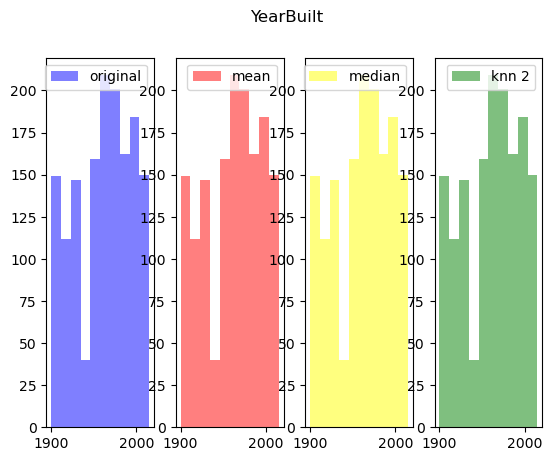

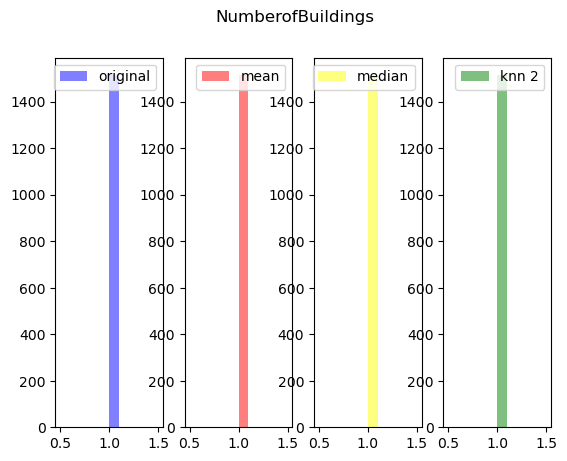

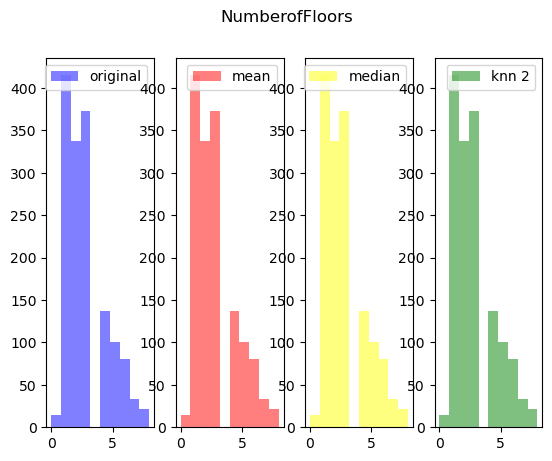

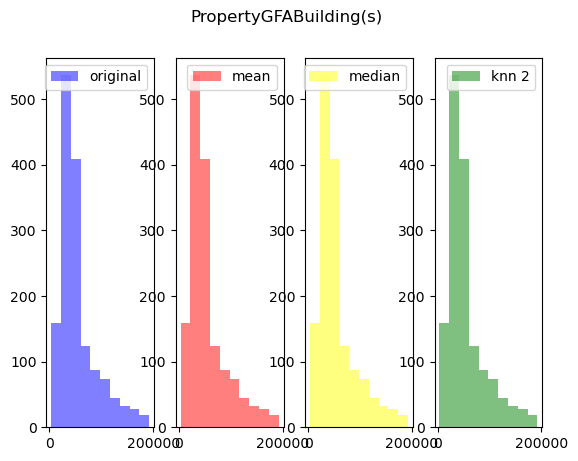

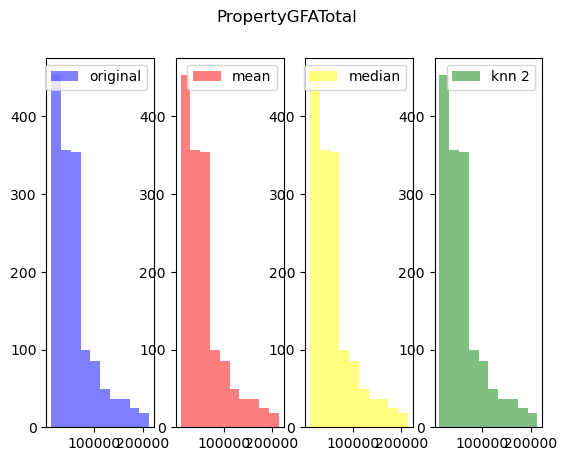

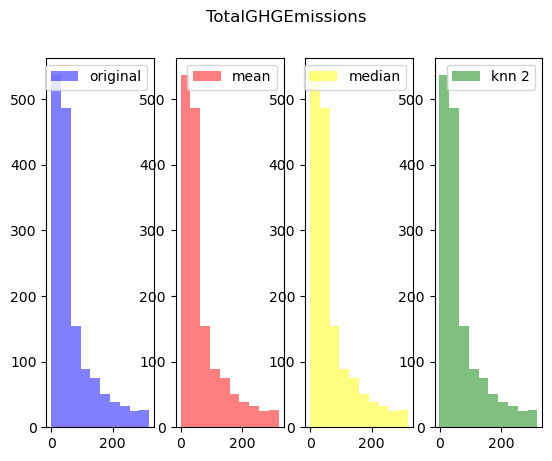

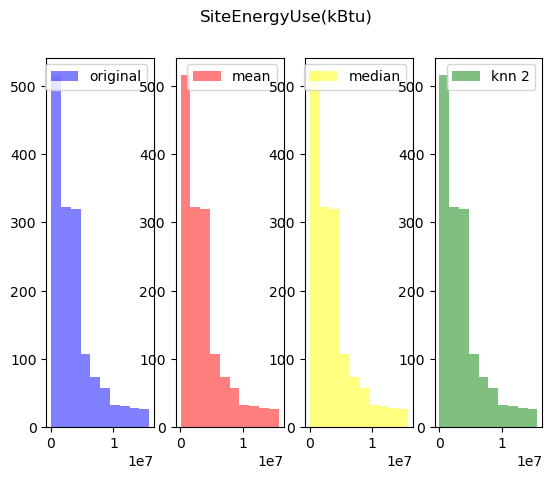

In [77]:
for elem in df.columns : 
    plt.subplot(1,4,1)
    plt.hist(df[elem].dropna(), 
         alpha=0.5, 
         label='original', color = 'blue') 
    plt.legend(loc='upper right')

    plt.subplot(1,4,2)
    plt.hist(data2[elem], 
         alpha=0.5,
         label='mean', color = 'red')
    plt.legend(loc='upper right')
  
    plt.subplot(1,4,3)
    plt.hist(data3[elem], 
         alpha=0.5,
         label='median', color = 'yellow')
    plt.legend(loc='upper right')
    
    plt.subplot(1,4,4)    
    plt.hist(data4[elem], 
         alpha=0.5,
         label='knn 2', color = 'green')
    plt.legend(loc='upper right')
    
    
    plt.suptitle(elem)
    plt.show()

In [35]:
# Recuperation des noms des variables 
var = df.columns.tolist()

In [37]:
# On supprime les variables dont on souhaite imputer par la médiane
var.remove('TotalGHGEmissions')
var

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'PropertyGFATotal',
 'SiteEnergyUse(kBtu)']

In [38]:
# Instanciation de l'imputation
imp2 = SimpleImputer(strategy='median')
imp3 = KNNImputer(n_neighbors=2, weights="uniform")

In [39]:
# Imputation par la methode du KNN
for elem in var : 
    df[elem] = imp3.fit_transform(df[elem].values.reshape(-1, 1))

In [40]:
var2 =  ['TotalGHGEmissions']

In [41]:
# Imputation par la méthode de la médiane
for elem in var2 : 
    df[elem] = imp2.fit_transform(df[elem].values.reshape(-1, 1))

In [42]:
df.isna().sum()

YearBuilt                 0
NumberofBuildings         0
NumberofFloors            0
PropertyGFABuilding(s)    0
PropertyGFATotal          0
TotalGHGEmissions         0
SiteEnergyUse(kBtu)       0
dtype: int64

In [43]:
df.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu)
0,1927.0,1.0,2.720407,88434.000000,88434.000000,249.98,7.226362e+06
1,1996.0,1.0,2.720407,88502.000000,103566.000000,295.86,8.387933e+06
2,1969.0,1.0,2.720407,55045.339734,58763.760722,41.96,3.618398e+06
3,1926.0,1.0,2.720407,61320.000000,61320.000000,286.43,6.794584e+06
4,1980.0,1.0,2.720407,113580.000000,175580.000000,41.96,1.417261e+07


In [44]:
df_Energy = df.copy()

In [45]:
# On ajoute les données de EnergyStarScore
df_Energy['ENERGYSTARScore'] = Energy

In [46]:
df_Energy.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu),ENERGYSTARScore
0,1927.0,1.0,2.720407,88434.000000,88434.000000,249.98,7.226362e+06,60.0
1,1996.0,1.0,2.720407,88502.000000,103566.000000,295.86,8.387933e+06,61.0
2,1969.0,1.0,2.720407,55045.339734,58763.760722,41.96,3.618398e+06,43.0
3,1926.0,1.0,2.720407,61320.000000,61320.000000,286.43,6.794584e+06,56.0
4,1980.0,1.0,2.720407,113580.000000,175580.000000,41.96,1.417261e+07,75.0


In [47]:
os.listdir()

['.ipynb_checkpoints',
 '.log',
 '1_Preprocessing.ipynb',
 '2_EDA.ipynb',
 '3_Modelisation.ipynb',
 'cleaned',
 'source']

### Ajout de variables catégorielles

In [47]:
# On recupère nos nouvelles variables
variables = ["YearBuilt", "NumberofBuildings", "NumberofFloors", "PropertyGFABuilding(s)", "PropertyGFATotal", "TotalGHGEmissions", "SiteEnergyUse(kBtu)", "ENERGYSTARScore", "BuildingType", "PrimaryPropertyType"]

In [48]:
# On crée un nouveau dataset à partir de ces variables
data2 = data[variables]

In [49]:
data2 = data2.copy()

In [50]:
# On supprimes les lignes qui n'ont pas ce champ renseigné car c'est notre première target et que cela ne coresspond que à 4 lignes
data2.dropna(subset = "TotalGHGEmissions", inplace = True)

In [51]:
Energy2 = data2['ENERGYSTARScore']
data2.drop("ENERGYSTARScore", axis = 1, inplace = True)

In [52]:
# On recupère les variables quantitatives
quant_na = ["YearBuilt", "NumberofBuildings", "NumberofFloors", "PropertyGFABuilding(s)", "PropertyGFATotal", "TotalGHGEmissions","SiteEnergyUse(kBtu)"]

In [53]:
# On traite les outliers avec la méthode interquartile
coeff = 1.5
for elem in quant_na :
    IQR = st.iqr(data2[elem].dropna())
    Q1 = np.percentile(data2[elem].dropna(), 25, interpolation = 'midpoint') 
    Q2 = np.percentile(data2[elem].dropna(), 50, interpolation = 'midpoint') 
    Q3 = np.percentile(data2[elem].dropna(), 75, interpolation = 'midpoint')
    low_lim = Q1 - coeff * IQR 
    up_lim = Q3 + coeff * IQR
    data2.loc[(data2[elem] < low_lim) | (data2[elem] > up_lim), elem] = np.nan

In [54]:
# Recuperation des noms des variables 
var = data2.columns.tolist()

In [55]:
# On supprime les variables dont on souhaite imputer par la médiane
var.remove('TotalGHGEmissions')
var.remove('BuildingType')
var.remove('PrimaryPropertyType')
var

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'PropertyGFATotal',
 'SiteEnergyUse(kBtu)']

In [56]:
# On impute par un KNN
for elem in var : 
    data2[elem] = imp3.fit_transform(data2[elem].values.reshape(-1, 1))

In [57]:
# On impute par la mediane
for elem in var2 : 
    data2[elem] = imp2.fit_transform(data2[elem].values.reshape(-1, 1))

In [58]:
# One hot encoding, dans le but de transformer les variables qualitatives en catégorie
# Convertir les colonnes en type catégorie 
data2['BuildingType']=data2['BuildingType'].astype('category')
data2['PrimaryPropertyType']=data2['PrimaryPropertyType'].astype('category')

# On les transforme en nouvelles variables numériques 
data2['BuildingTypeEnc']=data2['BuildingType'].cat.codes
data2['PrimaryPropertyTypeEnc']=data2['PrimaryPropertyType'].cat.codes

In [59]:
# Créer une instance du One hot encoder
enc=OneHotEncoder()

In [60]:
# On entraine l'encoding
enc_data=pd.DataFrame(enc.fit_transform(data2[['BuildingTypeEnc','PrimaryPropertyTypeEnc']]).toarray())
 
# On joint les 2 datasets
df_enc=data2.join(enc_data)

In [61]:
df_enc.columns

Index([             'YearBuilt',      'NumberofBuildings',
               'NumberofFloors', 'PropertyGFABuilding(s)',
             'PropertyGFATotal',      'TotalGHGEmissions',
          'SiteEnergyUse(kBtu)',           'BuildingType',
          'PrimaryPropertyType',        'BuildingTypeEnc',
       'PrimaryPropertyTypeEnc',                        0,
                              1,                        2,
                              3,                        4,
                              5,                        6,
                              7,                        8,
                              9,                       10,
                             11,                       12,
                             13,                       14,
                             15,                       16,
                             17,                       18,
                             19,                       20,
                             21,                       2

In [62]:
# on récupère les variables qui nous intéressent 
data_enc = df_enc[['YearBuilt','NumberofBuildings','NumberofFloors', 'PropertyGFABuilding(s)','PropertyGFATotal','TotalGHGEmissions','SiteEnergyUse(kBtu)','BuildingType','PrimaryPropertyType','BuildingTypeEnc','PrimaryPropertyTypeEnc']]

In [63]:
# Création de nos nouveaux dataset 
data_enc.drop(["BuildingType","PrimaryPropertyType"], axis = 1, inplace = True)

2023-03-15 12:14:59,498 [16636] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\AppData\Local\Temp\ipykernel_16636\2633907488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_enc.drop(["BuildingType","PrimaryPropertyType"], axis = 1, inplace = True)



In [64]:
data_enc.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu),BuildingTypeEnc,PrimaryPropertyTypeEnc
0,1927.0,1.0,2.720407,88434.000000,88434.000000,249.98,7.226362e+06,0,2
1,1996.0,1.0,2.720407,88502.000000,103566.000000,295.86,8.387933e+06,0,2
2,1969.0,1.0,2.720407,55020.913653,58736.079699,41.92,3.615950e+06,0,2
3,1926.0,1.0,2.720407,61320.000000,61320.000000,286.43,6.794584e+06,0,2
4,1980.0,1.0,2.720407,113580.000000,175580.000000,41.92,1.417261e+07,0,2


In [65]:
df_enc_Energy = data_enc.copy()

In [66]:
# On ajoute les données de EnergyStarScore
df_enc_Energy['ENERGYSTARScore'] = Energy2

In [67]:
df_enc_Energy.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu),BuildingTypeEnc,PrimaryPropertyTypeEnc,ENERGYSTARScore
0,1927.0,1.0,2.720407,88434.000000,88434.000000,249.98,7.226362e+06,0,2,60.0
1,1996.0,1.0,2.720407,88502.000000,103566.000000,295.86,8.387933e+06,0,2,61.0
2,1969.0,1.0,2.720407,55020.913653,58736.079699,41.92,3.615950e+06,0,2,43.0
3,1926.0,1.0,2.720407,61320.000000,61320.000000,286.43,6.794584e+06,0,2,56.0
4,1980.0,1.0,2.720407,113580.000000,175580.000000,41.92,1.417261e+07,0,2,75.0


In [68]:
path = 'cleaned/'
filename = 'dataset_cleaned2.csv'

In [69]:
data_enc.to_csv(path+filename, index = False)

In [70]:
path = 'cleaned/'
filename = 'dataset_cleaned2_EnergyScore.csv'

In [71]:
df_enc_Energy.to_csv(path+filename, index = False)

In [72]:
path = 'cleaned/'
filename = 'dataset_cleaned.csv'

In [73]:
df.to_csv(path+filename, index = False)

In [74]:
path = 'cleaned/'
filename = 'dataset_cleaned_EnergyScore.csv'

In [75]:
df_Energy.to_csv(path+filename, index = False)